### Reducción de dimensionalidad con PCA

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris

Cargamos primeramente los datos de las flores de Fisher

In [101]:
data = load_iris()

In [102]:
X = pd.DataFrame(data = data['data'], columns = data['feature_names'])
y = data['target']

In [103]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Escalamos los datos con el StandardScaler

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Inicializamos un método de PCA

In [13]:
pca = PCA().fit(X_scaled)

In [15]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

Con dos componentes nos quedamos con aproximadamente el 95% de la varianza explicada

In [16]:
X_scaled_reduced = PCA(n_components = 2).fit_transform(X_scaled)

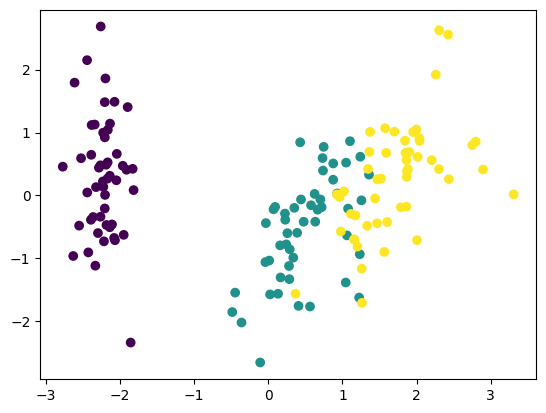

In [21]:
plt.scatter(x = X_scaled_reduced[:,0], y = X_scaled_reduced[:,1], c = y)

Probemos con otro conjunto de datos. En este caso, el llamado "california_housing"

In [47]:
from sklearn.datasets import fetch_california_housing, load_breast_cancer

In [48]:
data = fetch_california_housing()

In [49]:
X = pd.DataFrame(data = data['data'], columns = data['feature_names'])
y = data['target']

In [51]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Vamos a quitar las variables de latitud y longitud.

In [67]:
X = X[[feature for feature in list(X.columns) if(feature not in ['Latitude', 'Longitude'])]]

In [89]:
X_scaled = StandardScaler().fit_transform(X)

En este caso, el conjunto de datos ya está preprocesado

In [90]:
pca_california_housing = PCA().fit(X)

In [91]:
np.cumsum(pca_california_housing.explained_variance_ratio_)

array([0.99979594, 0.9999092 , 0.99999248, 0.99999768, 0.99999997,
       1.        ])

In [95]:
X_scaled_reduced = PCA(n_components = 2).fit_transform(X_scaled)

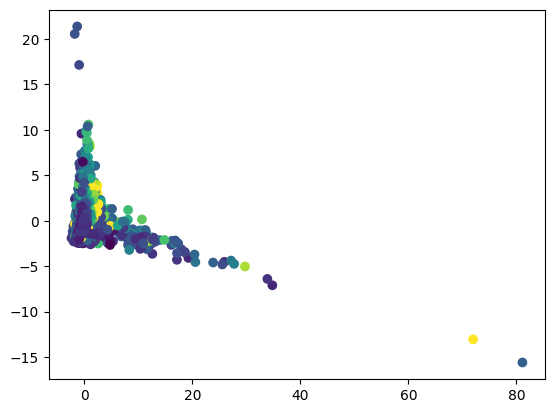

In [97]:
plt.scatter(x =  X_scaled_reduced[:,0], y =  X_scaled_reduced[:,1], c = y)

Reduce ahora la dimensión para el dataset de cáncer de mama.